In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Sample_-_Superstore[1].csv', encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [37]:
print(df.columns)
print(df.head(5))
print(df.describe())

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  

In [38]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [39]:
df.duplicated().sum()

0

### 1. Data Cleaning: Ensure Ship Date is After Order Date

In [40]:
import pandas as pd

# Convert dates to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Identify and correct inconsistencies
df.loc[df['Ship Date'] < df['Order Date'], 'Ship Date'] = df['Order Date']

print("Data cleaning complete: Ship dates corrected.")


Data cleaning complete: Ship dates corrected.


### 2. Data Transformation: Calculate Shipping Duration

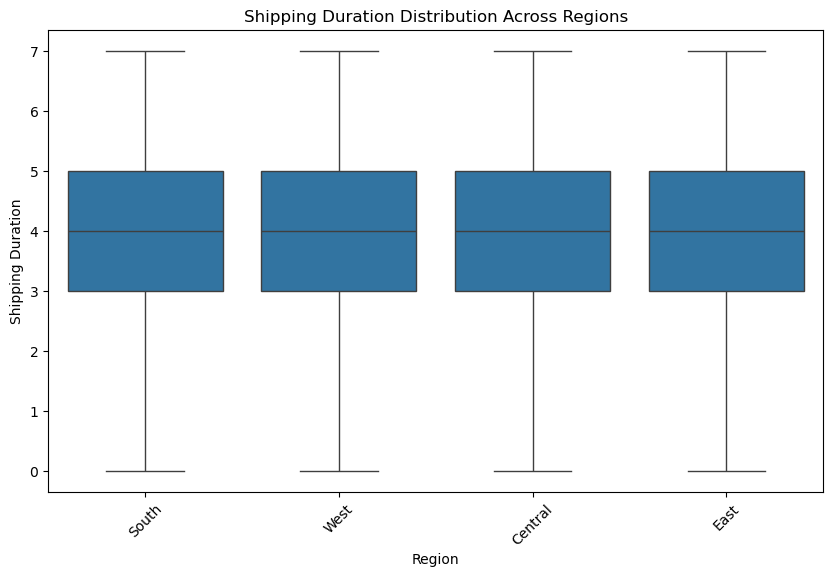

In [41]:
# Create a new column for shipping duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Distribution of shipping duration across regions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Shipping Duration', data=df)
plt.title('Shipping Duration Distribution Across Regions')
plt.xticks(rotation=45)
plt.show()


### 3. Time Series Analysis: Monthly Sales Trend

Category         Technology
Sub-Category        Copiers
Sales           2198.941618
Name: 14, dtype: object


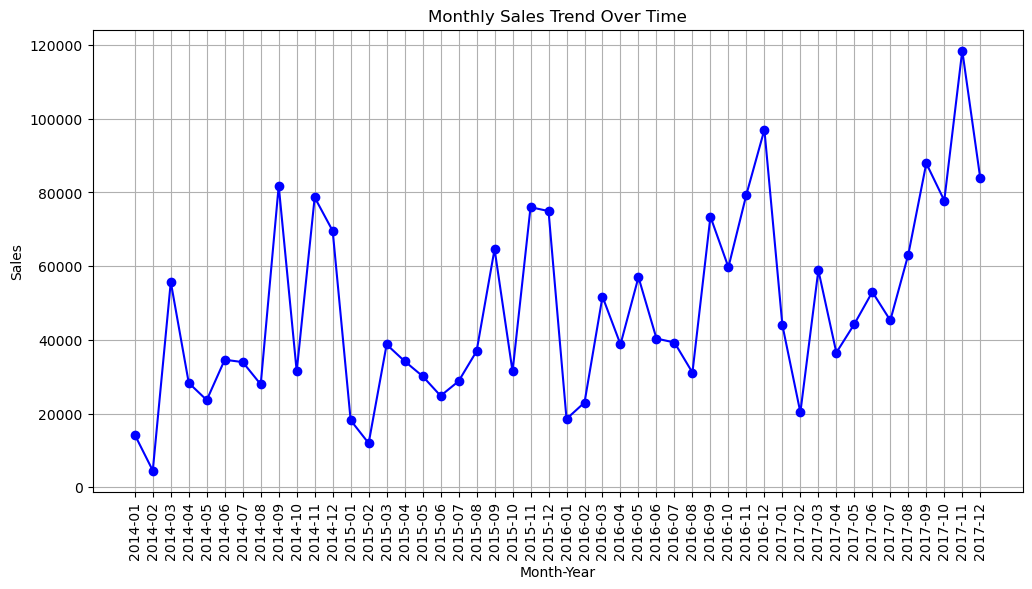

In [42]:
avg_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].mean().reset_index()
highest_subcategory = avg_sales.loc[avg_sales['Sales'].idxmax()]
print(highest_subcategory)
# Extract month and year for time series analysis
df['Month-Year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

# Aggregate sales by month-year
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month-Year'].astype(str), monthly_sales['Sales'], marker='o', color='b')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 4. Data Aggregation: Average Sales by Product Category and Sub-Category

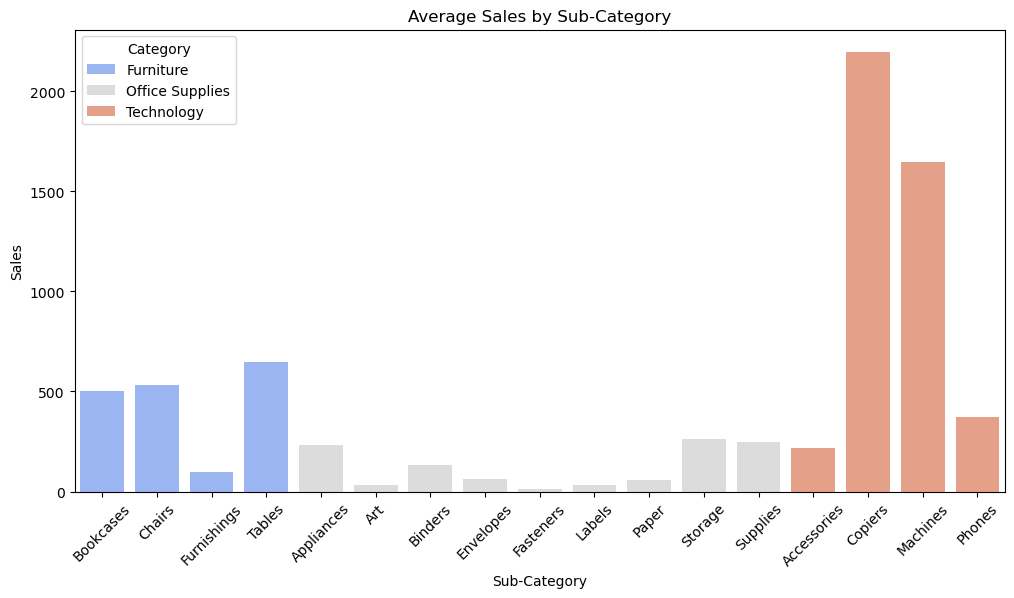

Highest Average Sales Sub-Category: Category         Technology
Sub-Category        Copiers
Sales           2198.941618
Name: 14, dtype: object


In [43]:
# Aggregate sales by category and sub-category
avg_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].mean().reset_index()

# Visualize average sales by sub-category
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Sales', data=avg_sales, hue='Category', palette='coolwarm')
plt.title('Average Sales by Sub-Category')
plt.xticks(rotation=45)
plt.show()

# Find the highest sub-category
highest_subcategory = avg_sales.loc[avg_sales['Sales'].idxmax()]
print("Highest Average Sales Sub-Category:", highest_subcategory)


### 5. Correlation Analysis: Discount vs Profit

Correlation between Discount and Profit: -0.21948745637176895


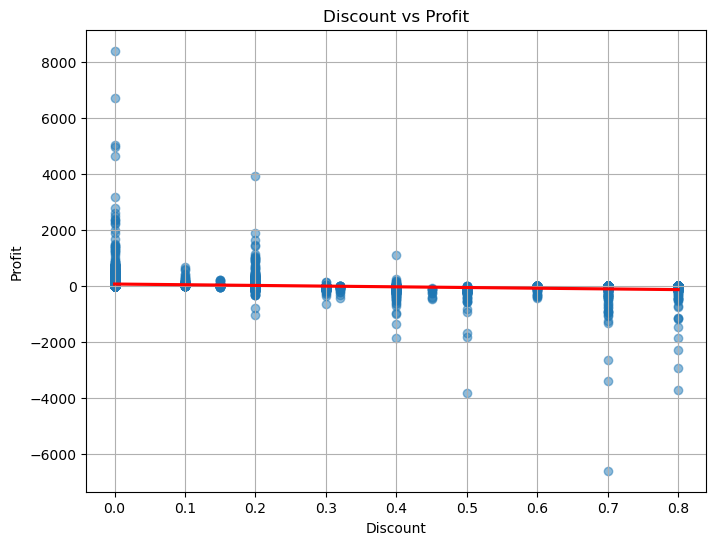

In [44]:
# Calculate correlation between discount and profit
correlation = df['Discount'].corr(df['Profit'])
print("Correlation between Discount and Profit:", correlation)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


### 6. Outlier Detection: Sales and Profit

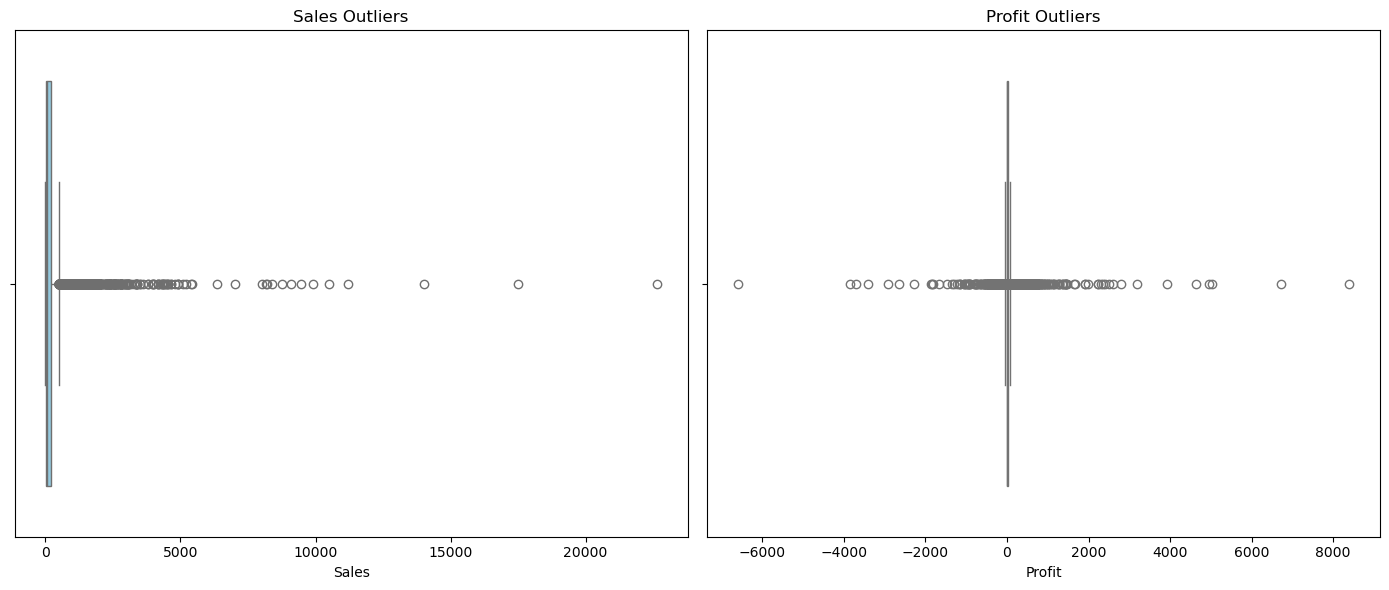

In [45]:
# Boxplot for sales and profit outliers
plt.figure(figsize=(14,6))

# Sales outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title('Sales Outliers')

# Profit outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Profit'], color='lightgreen')
plt.title('Profit Outliers')

plt.tight_layout()
plt.show()


### 7. Data Filtering: Impact of High Discounts on Profit Margins

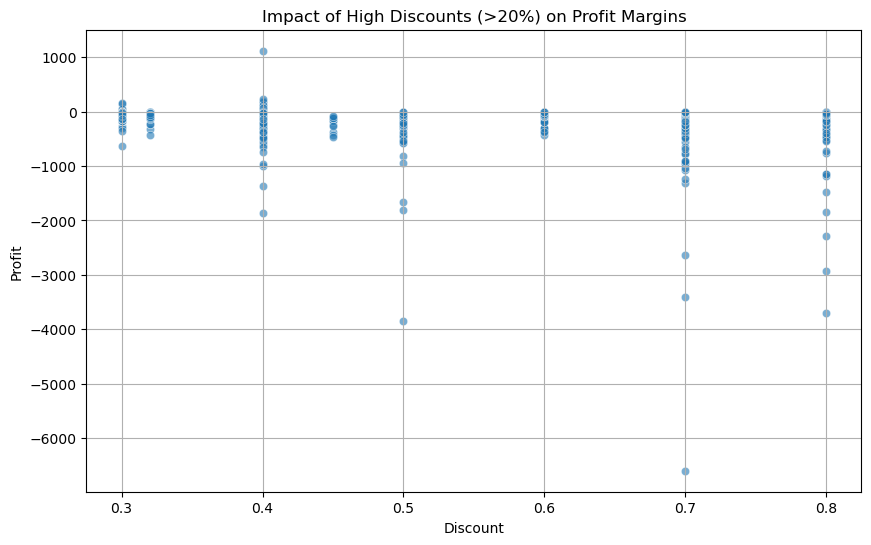

          Discount       Profit
count  1393.000000  1393.000000
mean      0.583266   -97.183098
std       0.184695   327.542304
min       0.300000 -6599.978000
25%       0.400000   -71.994000
50%       0.700000   -18.252500
75%       0.700000    -6.023700
max       0.800000  1119.996800


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter orders where the discount is greater than 20%
high_discount_df = df[df['Discount'] > 0.20]

# Create a scatter plot to visualize the relationship between discount and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=high_discount_df['Discount'], y=high_discount_df['Profit'], alpha=0.6)
plt.title('Impact of High Discounts (>20%) on Profit Margins')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Summary statistics
high_discount_summary = high_discount_df[['Discount', 'Profit']].describe()
print(high_discount_summary)


#### Insights:

Trend: As discounts increase beyond 20%, the scatter plot reveals a general decline in profit margins. This suggests that high discounts may significantly reduce profitability.
Actionable Insight: Companies should carefully consider the impact of heavy discounting, as it can erode profits.

### 8. Pivot Table Analysis: Most Profitable Segment by Region

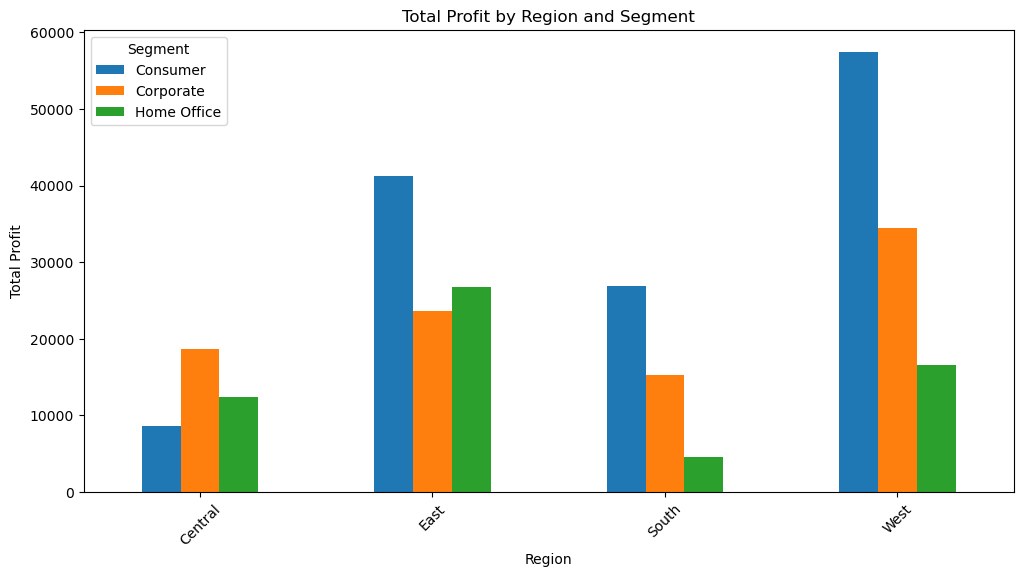

             Profit                               Sales               \
Segment    Consumer   Corporate Home Office    Consumer    Corporate   
Region                                                                 
Central   8564.0481  18703.9020  12438.4124  252031.434  157995.8128   
East     41190.9843  23622.5789  26709.2168  350908.167  200409.3470   
South    26913.5728  15215.2232   4620.6343  195580.971  121885.9325   
West     57450.6040  34437.4299  16530.4150  362880.773  225855.2745   

                      
Segment  Home Office  
Region                
Central   91212.6440  
East     127463.7260  
South     74255.0015  
West     136721.7770  


In [47]:
# Create a pivot table
pivot = df.pivot_table(values=['Sales', 'Profit'], index='Region', columns='Segment', aggfunc='sum')

# Plot total profit for each segment in each region
pivot['Profit'].plot(kind='bar', figsize=(12, 6), title='Total Profit by Region and Segment', ylabel='Total Profit', xlabel='Region')
plt.xticks(rotation=45)
plt.show()

# Insights
print(pivot)


### 9. Text Data Analysis: Most Common Words in Product Names Associated with High Sales

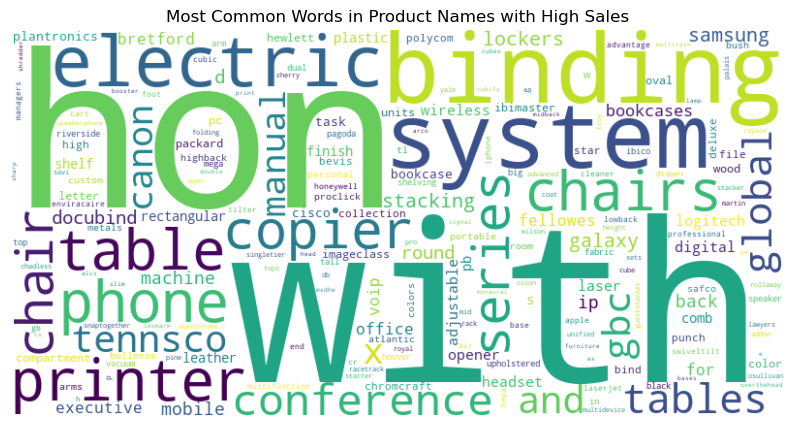

In [48]:
!pip install wordcloud
from collections import Counter
import re
from wordcloud import WordCloud

# Clean the product names
df['Product Name Cleaned'] = df['Product Name'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# Filter for high sales products (let's assume sales > $1000 as high sales)
high_sales_products = df[df['Sales'] > 1000]

# Extract words from product names
words = ' '.join(high_sales_products['Product Name Cleaned']).split()

# Count word frequencies
word_count = Counter(words)

# Plot word cloud for the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Product Names with High Sales')
plt.show()

### 10. Customer Segmentation: Top 10% Customers by Purchase Amount

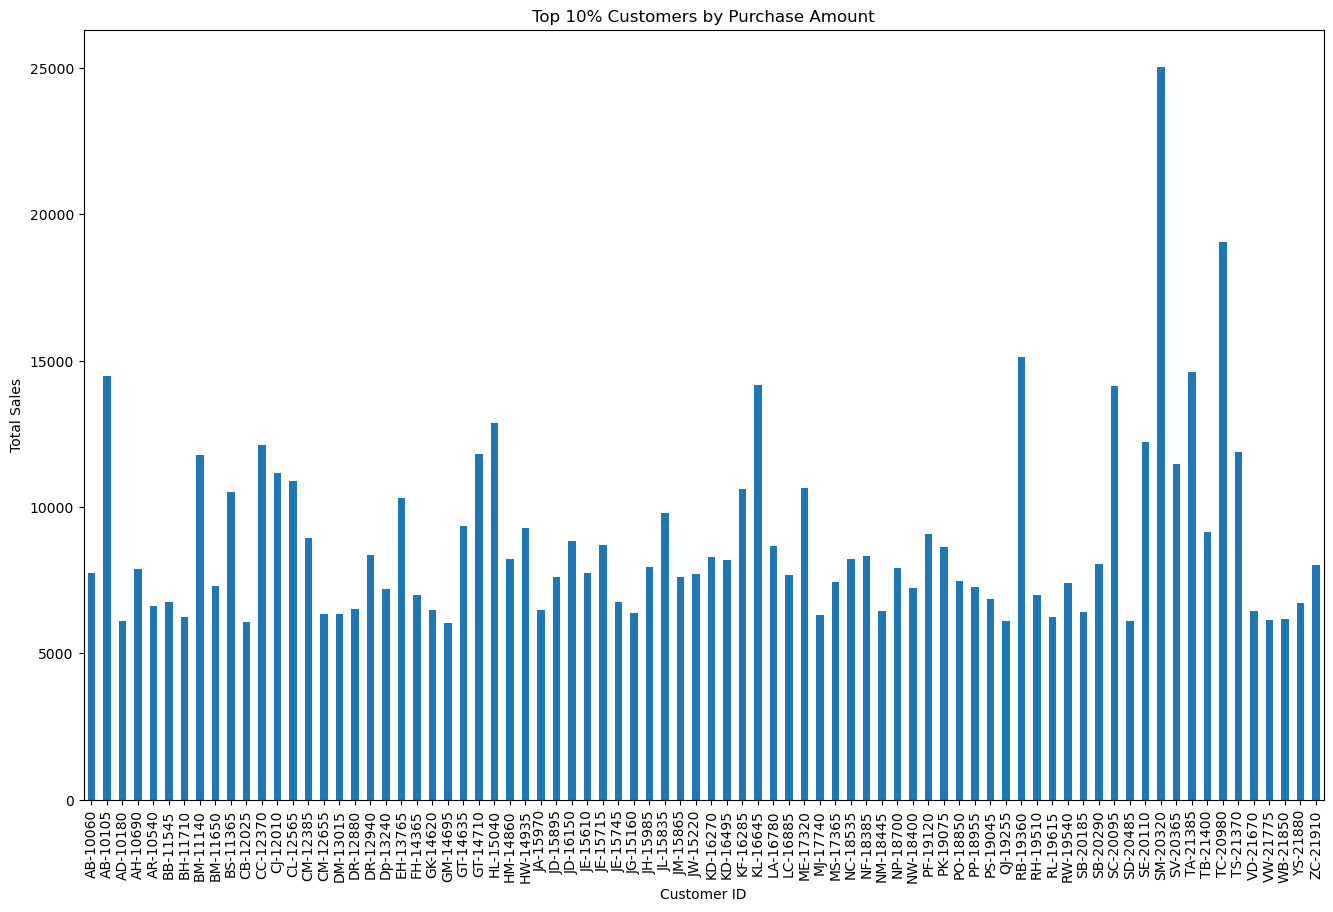

In [50]:
# Calculate total purchase amount for each customer
customer_sales = df.groupby('Customer ID')['Sales'].sum()

# Find the 90th percentile for segmentation
top_10_percent = customer_sales.quantile(0.90)

# Identify top 10% customers
top_customers = customer_sales[customer_sales > top_10_percent]

# Plot total purchases of top 10% customers
plt.figure(figsize=(16, 10))
top_customers.plot(kind='bar', title='Top 10% Customers by Purchase Amount', ylabel='Total Sales')
plt.xticks(rotation=90)
plt.show()


### 11. Advanced Visualization: Sales Performance by Product Category Across States

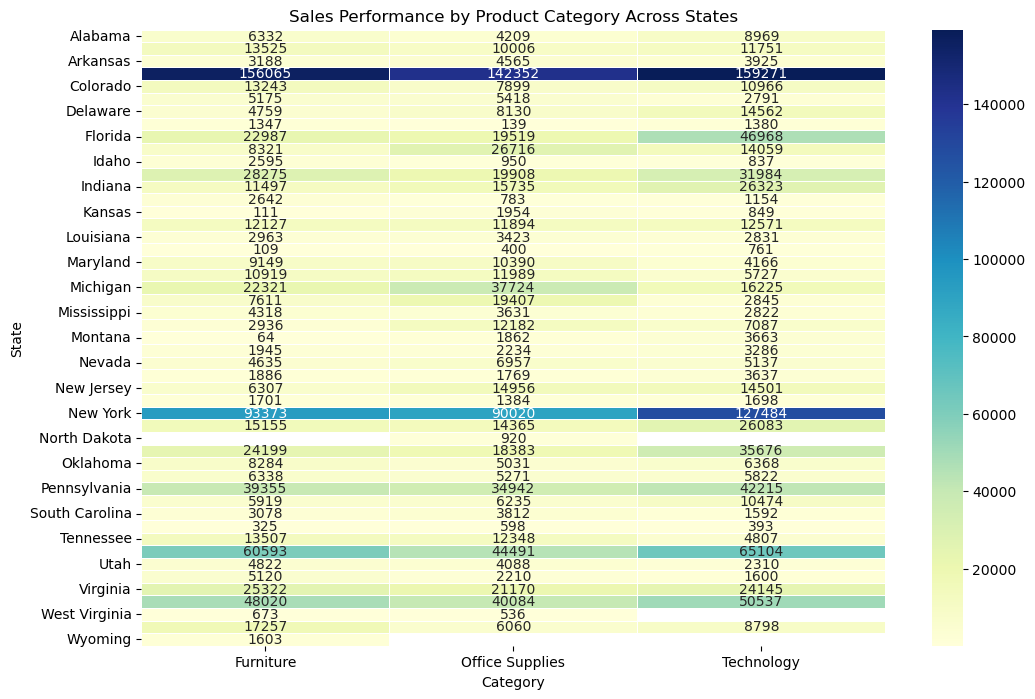

In [51]:
# Create a pivot table for total sales by category and state
category_state_sales = df.pivot_table(values='Sales', index='State', columns='Category', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_state_sales, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Sales Performance by Product Category Across States')
plt.show()


### 12. Data Resampling: Weekly Sales Trends

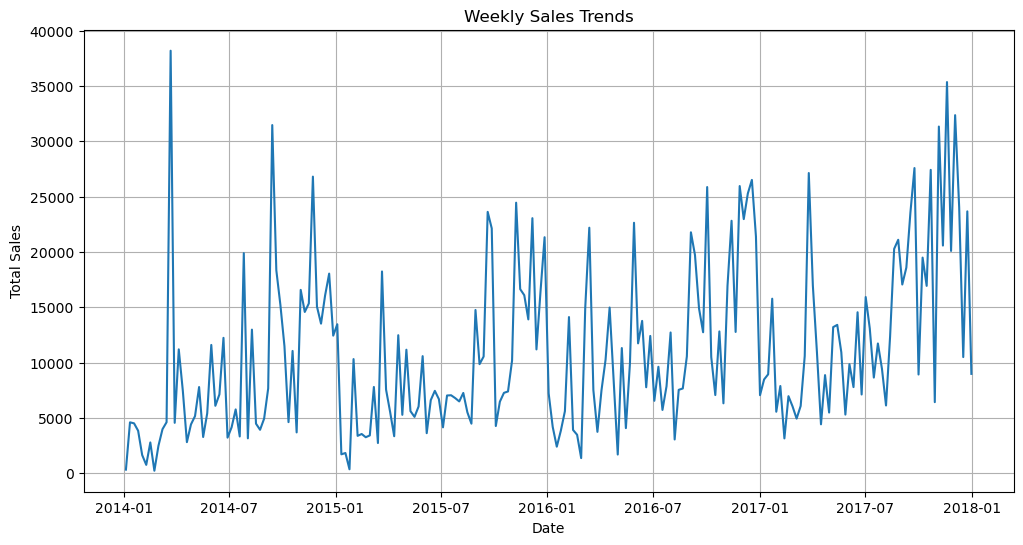

In [52]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Resample sales on a weekly basis
weekly_sales = df.resample('W', on='Order Date')['Sales'].sum()

# Plot weekly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales)
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### 13. Rolling Window Calculation: 7-day and 30-day Rolling Average Sales

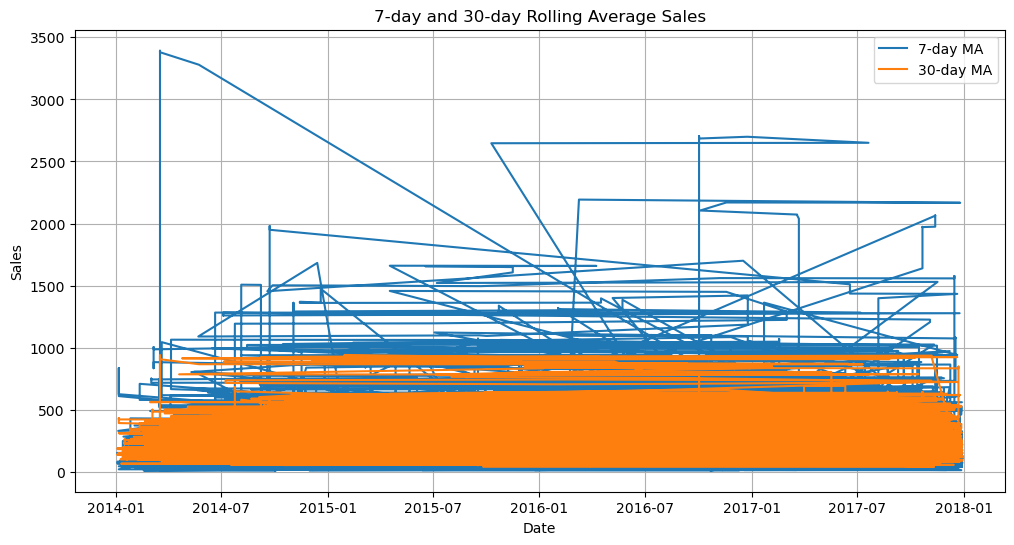

In [53]:
# Calculate 7-day and 30-day rolling averages
df['7-day MA'] = df['Sales'].rolling(window=7).mean()
df['30-day MA'] = df['Sales'].rolling(window=30).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], df['7-day MA'], label='7-day MA')
plt.plot(df['Order Date'], df['30-day MA'], label='30-day MA')
plt.title('7-day and 30-day Rolling Average Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()



### 14. Data Merging: Impact of Marketing Spend on Sales

#### Load the marketing spend dataset (assume it's named 'marketing.csv')
marketing_df = pd.read_csv('marketing.csv')

#### Merge with the sales dataset
merged_df = pd.merge(df, marketing_df, on='Region', how='left')

#### Analyze the relationship between marketing spend and sales
sns.scatterplot(x=merged_df['Marketing Spend'], y=merged_df['Sales'], alpha=0.6)
plt.title('Impact of Marketing Spend on Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### Insights
correlation = merged_df[['Marketing Spend', 'Sales']].corr()
print(correlation)

### 15. Custom Aggregation: Calculate the Weighted Average Discount by Product Category

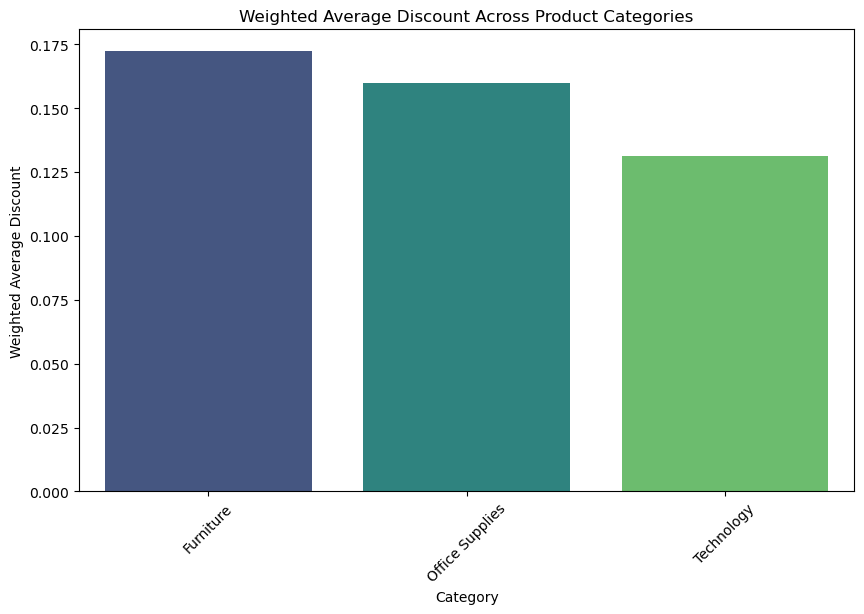

In [55]:
import pandas as pd

# Load your dataset into df
# df = pd.read_csv("your_dataset.csv")

# Define a custom aggregation function for weighted average
def weighted_average(df, weight_column, value_column):
    return (df[weight_column] * df[value_column]).sum() / df[weight_column].sum()

# Group by 'Category' and apply the weighted average for discount
category_discount = df.groupby('Category').apply(lambda x: weighted_average(x, 'Quantity', 'Discount')).reset_index()
category_discount.columns = ['Category', 'Weighted Average Discount']

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=category_discount, x='Category', y='Weighted Average Discount', palette='viridis')
plt.title('Weighted Average Discount Across Product Categories')
plt.ylabel('Weighted Average Discount')
plt.xticks(rotation=45)
plt.show()

# Insight:
# Analyze which categories are getting the highest discounts. High discounts might be applied to certain categories to boost sales or clear stock.


### 16. Data Binning: Bin the 'Sales' Column into Quartiles and Analyze the Distribution of Profit

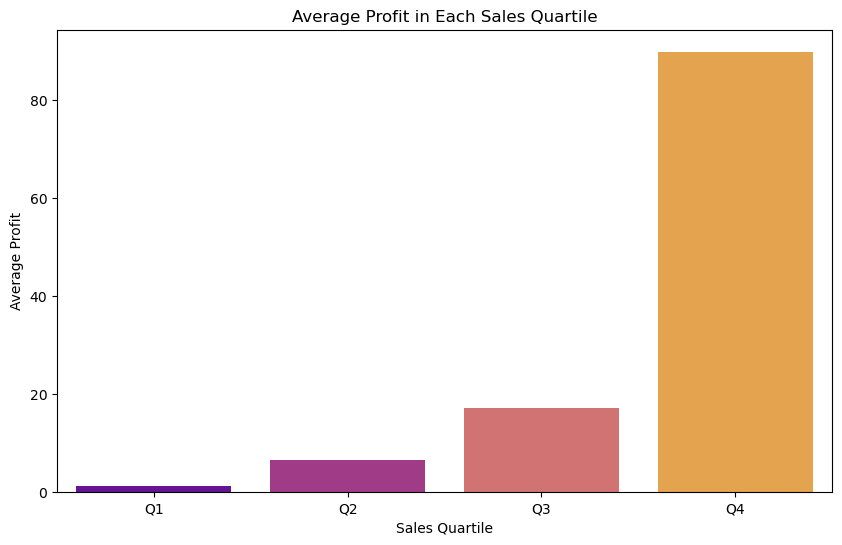

In [56]:
# Bin the 'Sales' column into quartiles
df['Sales Quartile'] = pd.qcut(df['Sales'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Group by sales quartiles and calculate average profit
quartile_profit = df.groupby('Sales Quartile')['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=quartile_profit, x='Sales Quartile', y='Profit', palette='plasma')
plt.title('Average Profit in Each Sales Quartile')
plt.ylabel('Average Profit')
plt.show()

# Insight:
# Quartiles help identify how profits differ across different levels of sales. Typically, higher sales might be expected to result in higher profits, but heavy discounts or costs may reduce profitability.


### 17. Data Sorting and Ranking: Rank the Products Based on Total Sales and Profit

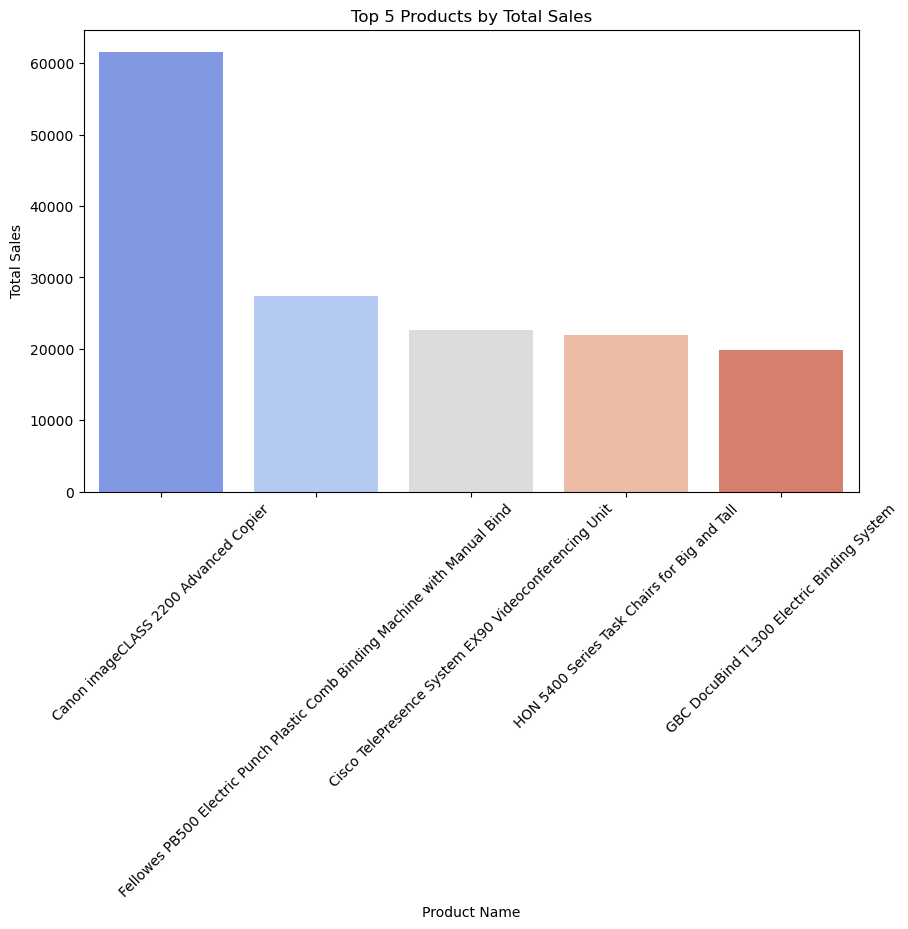

In [57]:
# Rank products based on sales and profit
product_ranking = df.groupby('Product Name').agg({'Sales':'sum', 'Profit':'sum'}).sort_values(by='Sales', ascending=False).reset_index()

# Top 5 products based on sales
top_5_products_sales = product_ranking.head(5)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=top_5_products_sales, x='Product Name', y='Sales', palette='coolwarm')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Insight:
# These are the products that drive the most sales. The characteristics of top products might be their high demand, unique features, or strategic pricing.


### 18. Complex Data Extraction: Extract Orders Shipped with a Delay (Shipping Duration > 5 Days)

Total delayed orders: 1824


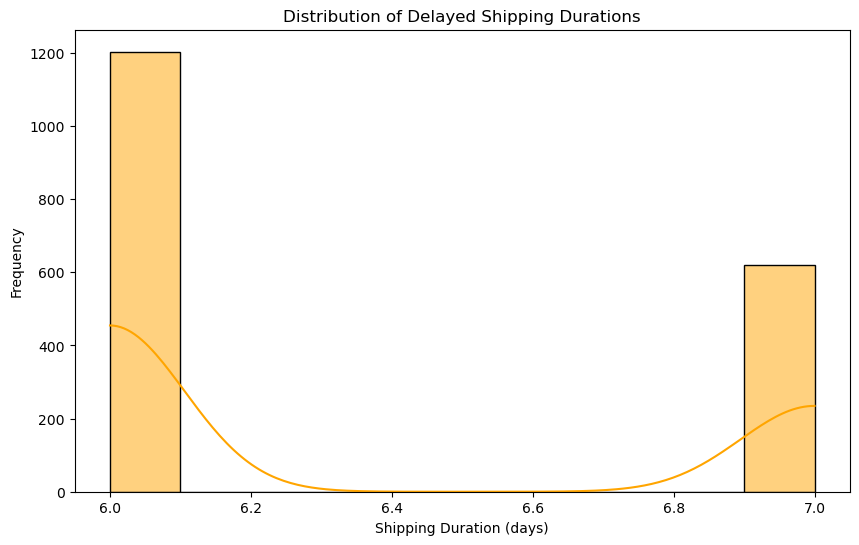

In [59]:
# Calculate shipping duration
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract delayed shipments (Shipping Duration > 5 days)
delayed_orders = df[df['Shipping Duration'] > 5]

# Check the number of delayed shipments
print(f"Total delayed orders: {len(delayed_orders)}")

# Visualization of delayed shipping duration distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(delayed_orders['Shipping Duration'], bins=10, kde=True, color='orange')
plt.title('Distribution of Delayed Shipping Durations')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.show()

# Insight:
# Analyze how frequently orders are delayed and the typical duration of delays. The distribution shows how many orders are delayed beyond 5 days and the average delay time.


### 19. Data Deduplication: Identify and Remove Duplicate Entries